<a href="https://colab.research.google.com/github/juliocesar014/Curso-Machine-Learning/blob/main/ML_Implementa%C3%A7%C3%A3o_dos_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Conjunto de importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
#Carrega o dataset com os dados para o treinamento e validacao
df = pd.read_csv("dados_cryotherapy.csv", encoding="utf-8")

In [5]:
#Listando as 10 primeiras linhas
df.head(10)

,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
0,1,35,12,5,1,100,0
1,1,29,7,5,1,96,1
2,1,50,8,1,3,132,0
3,1,32,11,7,3,750,0
4,1,67,9,1,1,42,0
5,1,41,8,2,2,20,1
6,1,36,11,2,1,8,0
7,1,59,3,3,3,20,0
8,1,20,4,12,1,6,1
9,2,34,11,3,3,150,0


In [12]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(df[['Sexo', 'Tempo', 'Numero_Verrugas', 'Tipo','Area']])

#Definição do atributo de classificacao
data_classif = np.array(df['Resultado_Tratamento'])

In [13]:
#Verificando o formato dos dados
df.shape

(90, 7)

In [15]:
#Verificando os tipos das fetchurs
df.dtypes

Sexo                    int64
Idade                   int64
Tempo                   int64
Numero_Verrugas         int64
Tipo                    int64
Area                    int64
Resultado_Tratamento    int64
dtype: object

In [17]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

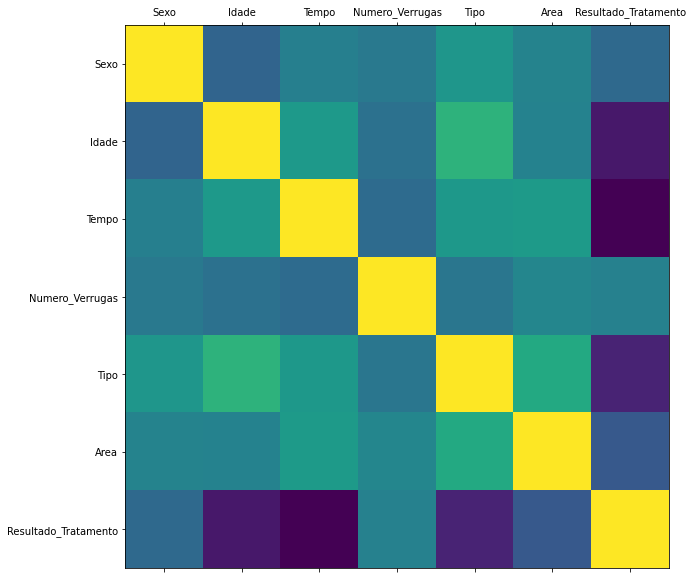

In [18]:
plot_corr(df)

In [19]:
# Spliting = 75% para dados de treino e 25% para dados de teste

In [28]:
#Definição dos conjuntos de treinamento e validação
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.25)

In [29]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[  2   5   2   1  70]
 [  2   8   2   1   6]
 [  2   8  12   1  30]
 [  1   7   6   1  96]
 [  2   4  11   1 100]
 [  2  11   3   3 150]
 [  2  10   7   1  35]
 [  1   4   3   1   6]
 [  1  10   7   1  42]
 [  2   9   4   3 132]
 [  2   5   9   1 100]
 [  1  11   2   1  10]
 [  1   4   3   1 100]
 [  1   8   1   3 132]
 [  1  12   1   3 150]
 [  2  10   5   1  35]
 [  1  10   7   3  72]
 [  2   1   8   3 115]
 [  1   9   9   1 100]
 [  1  10   1   3  95]
 [  2  11  12   3  72]
 [  2   5   1   1  80]
 [  1   5   4   1  63]
 [  1   2   2   1 115]
 [  1   5  10   1  63]
 [  1   2   3   3  20]
 [  1  11   9   2  80]
 [  2   2  10   3  70]
 [  2   1  12   3  70]
 [  2   2   3   1   4]
 [  1   4   1   1  80]
 [  1  11   3   2  60]
 [  2  12   3   3  95]
 [  1  10   5   1   6]
 [  1  11   1   3 150]
 [  1  10  11   1  30]
 [  1  12   5   1 100]
 [  1   9   8   1  20]
 [  2   4   1   1   6]
 [  2  12   4   3 750]
 [  1   8  11   3 132]
 [  1  11

In [30]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(df.index)) * 100))

74.44% nos dados de treino
25.56% nos dados de teste


In [31]:
# - Aplicando o Algoritmo com o Naive Bayes - GaussianNB.

In [32]:
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [34]:
#Predição e acurácia para o conjunto de treinamento
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
#print(accuracy_score(y_treino, y_pred_treino)*100 + '%').str()
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.8507462686567164
Na Base de Treinamento


In [36]:
#Predição e acurácia para o conjunto de validação
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.6086956521739131
na Base de Teste


In [38]:
from sklearn import metrics

In [39]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[8 3]
 [6 6]]

Classification Report
              precision    recall  f1-score   support

           1       0.57      0.73      0.64        11
           0       0.67      0.50      0.57        12

    accuracy                           0.61        23
   macro avg       0.62      0.61      0.61        23
weighted avg       0.62      0.61      0.60        23



In [40]:
# Criando uma Curva Roc
print("Roc Curve")

# Compute ROC curve and ROC area for each class
#fpr = dict()
#tpr = dict()
#roc_auc = dict()
#for i in range(y_pred_val):
#    fpr[i], tpr[i], _ = roc_curve(y_val, y_pred_val)
#    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Roc Curve


In [41]:
# Otimizando o modelo com RandomForest
# Algoritmo 02 - RandomForest - Realizando operações com mais de um Algoritmo de Machine Learning (Classificação)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(x_treino, y_treino.ravel())

RandomForestClassifier(random_state=42)

In [48]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(x_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, rf_predict_train)))
print("OK")

Exatidão (Accuracy): 1.0000
OK


In [46]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(x_val)
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, rf_predict_test)))
print("OK")

Exatidão (Accuracy): na Base de Teste 0.7391
OK


In [49]:
# Validação do Modelo com a Matrix de Confusão
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[10  1]
 [ 5  7]]

Classification Report
              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           0       0.88      0.58      0.70        12

    accuracy                           0.74        23
   macro avg       0.77      0.75      0.73        23
weighted avg       0.78      0.74      0.73        23



In [52]:
#Regressão Logística

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
# Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(x_treino, y_treino.ravel())
lr_predict_test = modelo_v3.predict(x_val)

In [57]:
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_val, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): na Base de Teste 0.7826

Classification Report
              precision    recall  f1-score   support

           1       0.75      0.82      0.78        11
           0       0.82      0.75      0.78        12

    accuracy                           0.78        23
   macro avg       0.78      0.78      0.78        23
weighted avg       0.79      0.78      0.78        23



In [63]:
### Resumindo
## Exatidão nos dados Cryotherapy

# Modelo usando algoritmo Naive Bayes         = 0.85  => Segunda Execução: 0.85 
# Modelo usando algoritmo Random Forest       = 1.00  => Segunda Execução: 1.00
# Modelo usando algoritmo Regressão Logística = 0.78  => Segunda Execução: 0.78

In [65]:
### Conclusão
## Melhor opção: Regressão Logística = 0.78